# Image Classification with CNN

In [1]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 2.10.0 Tensorflow Current Version: 2.10.1


In [ ]:
# !pip uninstall tf-keras
# !pip install keras-tuner
# !pip install tensorflow==2.16.1

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, datasets, metrics
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

random.seed(32)
np.random.seed(32)
tf.random.set_seed(32)


# Dataset

In [3]:
(X_train, y_train), (X_val, y_val) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [5]:
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 1)


In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
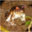

In [7]:
X_train[0]

In [8]:
def show_random_examples(images, labels, num_examples=25, figsize=(10, 10)):
    indices = np.random.choice(len(images), num_examples, replace=False)
    plt.figure(figsize=figsize)
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap='gray')
        plt.xlabel(labels[idx])
    plt.show()

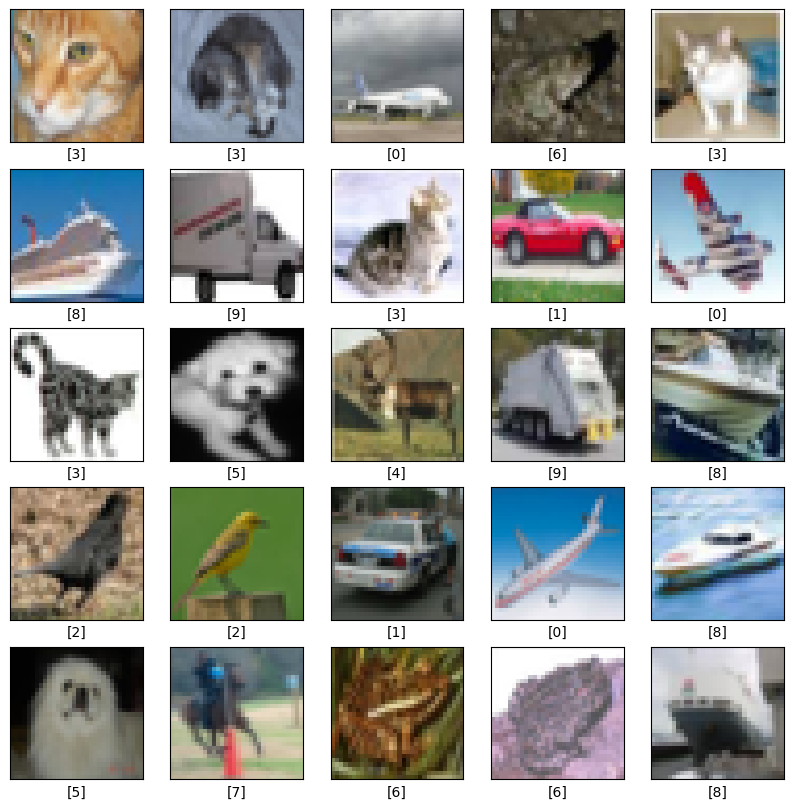

In [9]:
show_random_examples(X_train, y_train)

# Data Preparation

In [10]:
X_train, X_val = X_train / 255.0, X_val / 255.0

In [12]:
def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):
    if batch_size is None:
        batch_size = len(X_train)
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)
    return train_dataset, val_dataset

In [13]:
train_ds, val_ds = prepare_datasets(X_train, X_val, y_train, y_val, batch_size=32)

# Create & Compile Model

In [15]:
model = Sequential([
    Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),

    layers.Dense(10, activation='softmax')

])

In [16]:
metrics = [
    metrics.SparseCategoricalAccuracy(name="sparse_categorical_accuracy"),

    metrics.AUC(name='auc', multi_label=True)]

In [17]:
model.compile(optimizer='adam',

              loss="sparse_categorical_crossentropy",

              metrics=metrics)



In [18]:
early_stopping = EarlyStopping(monitor='val_loss',
                           patience=20,
                           verbose=1)

model_checkpoint = ModelCheckpoint(filepath='cifar10_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1)

# Model Training

In [19]:
history = model.fit(train_ds,
                    epochs=100,
                    validation_data=val_ds,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5376 - loss: 1.6884 - sparse_categorical_accuracy: 0.3725
Epoch 1: val_loss improved from inf to 1.26957, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - auc: 0.5376 - loss: 1.6883 - sparse_categorical_accuracy: 0.3726 - val_auc: 0.5821 - val_loss: 1.2696 - val_sparse_categorical_accuracy: 0.5523
Epoch 2/100
1554/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5273 - loss: 1.1261 - sparse_categorical_accuracy: 0.5992
Epoch 2: val_loss improved from 1.26957 to 1.02834, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - auc: 0.5273 - loss: 1.1259 - sparse_categorical_accuracy: 0.5993 - val_auc: 0.5467 - val_loss: 1.0283 - val_sparse_categorical_accuracy: 0.6397
Epoch 3/100
1543/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5216 - loss: 0.9210 - sparse_categorical_accuracy: 0.6755
Epoch 3: val_loss improved from 1.02834 to 0.89934, saving model to cifar10_model.k

# Model Performance Plot

In [20]:
def plot_training_history(history, train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):

    #Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_loss], label='Training Loss')
    plt.plot(history.history[val_loss], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Metrics
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_metric], label=f"Training: {train_metric}")
    plt.plot(history.history[val_metric], label=f"Validation: {val_metric}")
    plt.title(f'Training and Validation {train_metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(f'train_metric')
    plt.legend()
    plt.show()

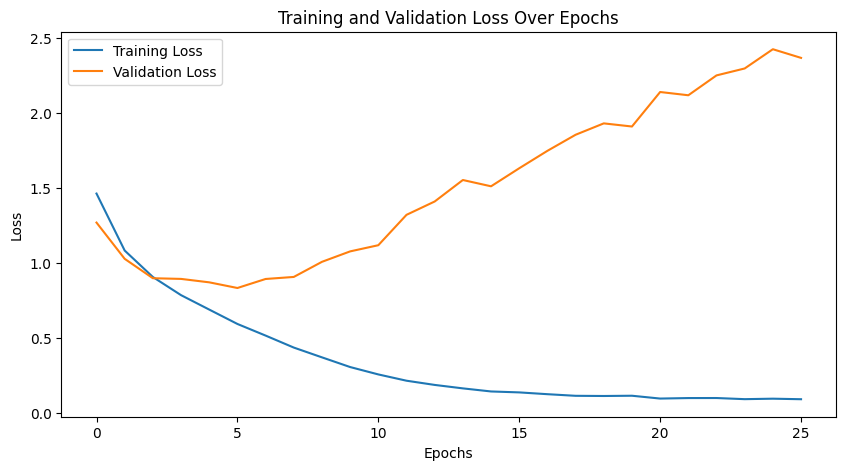

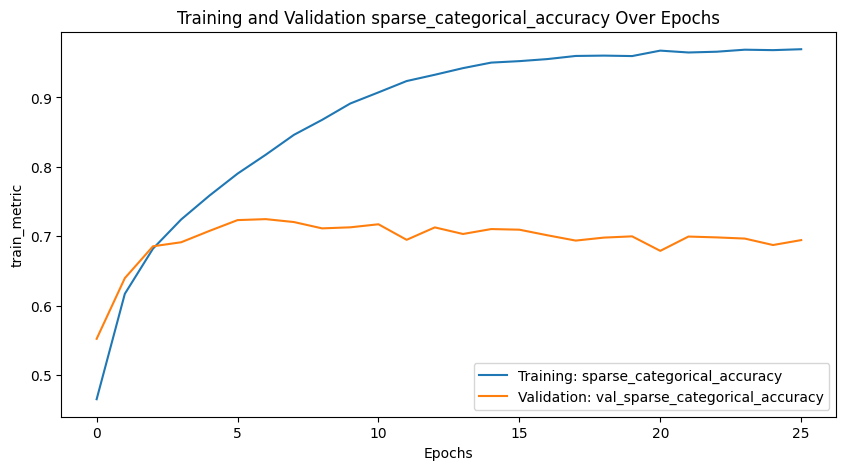

In [21]:

plot_training_history(history, train_loss='loss', train_metric='sparse_categorical_accuracy', val_loss='val_loss', val_metric='val_sparse_categorical_accuracy')



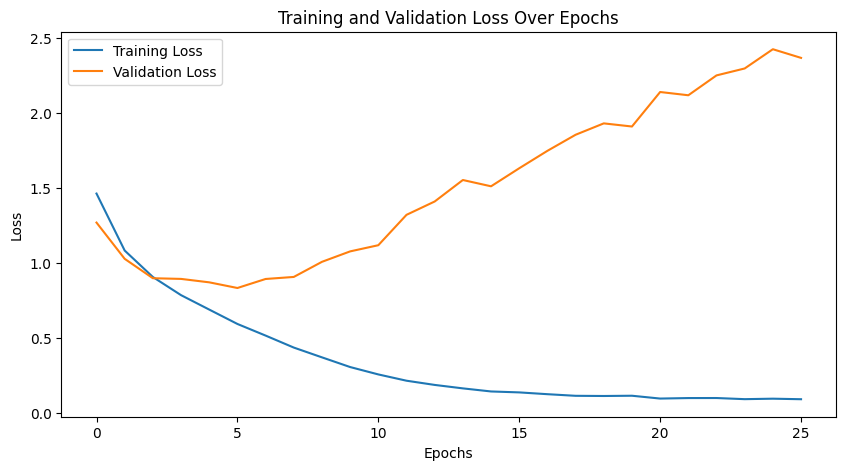

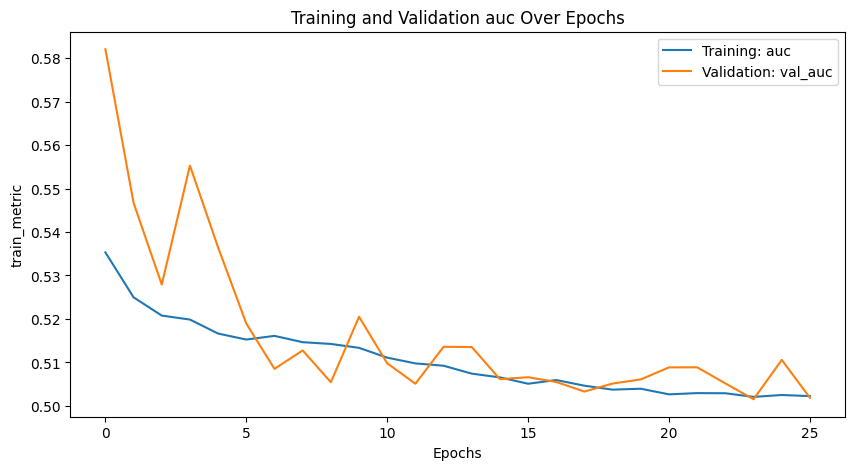

In [22]:
plot_training_history(history, train_loss='loss', train_metric='auc', val_loss='val_loss', val_metric='val_auc')

# Model Performance Numeric

In [23]:
val_loss, sparse_categorical_accuracy, auc = model.evaluate(val_ds, verbose=0)
print(f"Loss: {val_loss}")
print(f"Accuracy: {sparse_categorical_accuracy}")
print(f"AUC: {auc}")

Loss: 2.365422487258911
Accuracy: 0.6945000290870667
AUC: 0.5018738508224487
